这个实验需要拟合的函数为
$$Y = 10*x_2/(1+x_1^2)+5*sin(x_3*x_4)+2*x_5$$

* np时选了n为10000，p为100作为例子,所使用的网络为两层[100, 512, 1]的全连接网络

In [1]:
cd ~/keras

/home/zhengfeng/keras


In [3]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers
from keras import regularizers
import matplotlib.pylab as plt

Using TensorFlow backend.


Couldn't import dot_parser, loading of dot files will not be possible.


In [7]:
%matplotlib inline

In [8]:
#[(200,500,300),(50,12,500),(50,500,500),(50,1000,1000),(100,12,500),(100,500,1000),(100,1000,1000)]
#10000,100,500 
n = 10000
p = 100
problem = 'NLhard'

In [9]:
X = np.load("/home/zhengfeng/simulationData/"+problem+"_X_"+str(n)+"_"+str(p)+".npy")
y = np.load("/home/zhengfeng/simulationData/"+problem+"_Y_"+str(n)+"_"+str(p)+".npy")
ValidationX = np.load("/home/zhengfeng/simulationData/"+problem+"_VX_"+str(n)+"_"+str(p)+".npy")
Validationy = np.load("/home/zhengfeng/simulationData/"+problem+"_VY_"+str(n)+"_"+str(p)+".npy")

In [46]:
model = Sequential()
layer1 = Dense(512, activation="relu", init="normal", input_dim=p)
layer2 = Dense(1, activation="linear", init="normal", input_dim=512)
# layer3 = Dense(1, activation="linear", init="normal", input_dim=16)
# layer4 = Dense(1, activation="linear", init="normal", input_dim=16)
model.add(layer1)
model.add(layer2)
# model.add(layer3)
# model.add(layer4)
# model.add(Dense(16, input_dim=32,init='normal',activation='sigmoid'))
# model.add(Dense(1, init='normal',activation='linear'))

model.compile(loss='mean_squared_error', optimizer=optimizers.Adam())
# model.compile(loss='mean_squared_error', optimizer=optimizers.SGDModifiedOnLayer(layers=[0],tau=0.1, alpha=0.2,lr =0.01))



/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, kernel_initializer="normal", activation="relu", input_dim=100)`
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="normal", activation="linear", input_dim=512)`
  app.launch_new_instance()


* pre-train的结果loss为7.4（第49行），不加惩罚的时候如果样本量足够，采用3-4层网络的时候，用relu做activation，adam作为optimizer可以很快收敛到loss为0.4以下。2层的时候收敛比较慢，这里取了某一次训练的结果，保存W矩阵作为L1和L0的预训练参数

In [49]:
#pre-train
model.fit(X, y, validation_data=(ValidationX,Validationy),batch_size=25, nb_epoch=10)
model.save_weights("/home/zhengfeng/exp/weights.h5")
w = layer1.get_weights()
np.savetxt('/home/zhengfeng/exp/WPretrain.txt',w[0].T)

Train on 10000 samples, validate on 500 samples
Epoch 1/10
10000/10000 [==============================] - 0s - loss: 0.3589 - val_loss: 7.6287
Epoch 2/10
10000/10000 [==============================] - 0s - loss: 0.3157 - val_loss: 7.5368
Epoch 3/10
10000/10000 [==============================] - 0s - loss: 0.2860 - val_loss: 7.6171
Epoch 4/10
10000/10000 [==============================] - 0s - loss: 0.2787 - val_loss: 7.7155
Epoch 5/10
10000/10000 [==============================] - 0s - loss: 0.3289 - val_loss: 7.7215
Epoch 6/10
10000/10000 [==============================] - 0s - loss: 0.3106 - val_loss: 7.4187
Epoch 7/10
10000/10000 [==============================] - 0s - loss: 0.3071 - val_loss: 7.5978
Epoch 8/10
10000/10000 [==============================] - 0s - loss: 0.3018 - val_loss: 7.6806
Epoch 9/10
10000/10000 [==============================] - 0s - loss: 0.3198 - val_loss: 7.4412
Epoch 10/10
10000/10000 [==============================] - 0s - loss: 0.2980 - val_loss: 7.5500


* 第23行拟合结果与ground truth的对比，描出validation set的前100个点

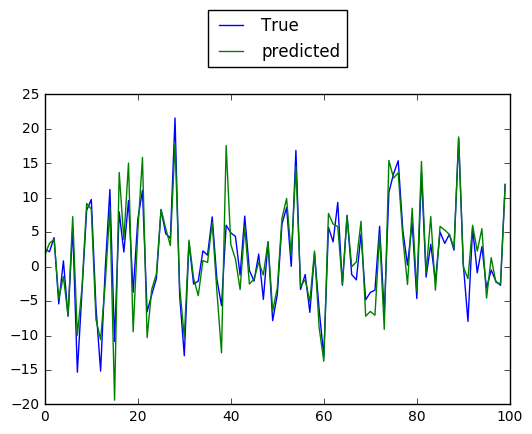

In [23]:
predictY = model.predict(ValidationX)
plt.plot(Validationy[:100], label = 'True')
plt.plot(predictY[:100], label = "predicted")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3))
plt.show()

In [24]:
w_count = np.full_like(w[0].T[0],0)
w_sum = np.full_like(w[0].T[0],0.0)
for i in range(w[0].T.shape[0]):
    w_sum += abs(w[0].T[i])
    w_count += (abs(w[0].T[i])>0)*1

* 下面为第一层权重W

In [50]:
w[0].T[0]

array([ 0.09278118, -0.16892444, -0.13829744,  0.03654684, -0.05184849,
       -0.26114312, -0.10626697,  0.04156574,  0.0141403 , -0.15726744,
       -0.11260039,  0.03022869, -0.03858117, -0.02039296,  0.26420972,
       -0.2188682 , -0.15289137, -0.05684719, -0.14180234, -0.06952707,
       -0.0715394 ,  0.08293524,  0.27985269,  0.1427587 , -0.05083049,
       -0.04054165, -0.2246816 ,  0.06782326, -0.32947537, -0.19026478,
       -0.20908028,  0.15788682, -0.16050909, -0.33744651,  0.00529721,
       -0.16286002, -0.13798043,  0.09504041,  0.02439573, -0.05264817,
       -0.11660694, -0.16580138, -0.05294882, -0.0231732 , -0.32504466,
       -0.22308141, -0.46594307,  0.01739671,  0.25828356, -0.15222782,
        0.08504059,  0.01498955,  0.21210232,  0.05096337, -0.04683202,
        0.05332351, -0.04535295,  0.54903281,  0.10764734, -0.06019001,
       -0.18961149,  0.02713002, -0.31916261, -0.30949757,  0.2236052 ,
       -0.16225185, -0.02499829, -0.00958717, -0.06954027, -0.00

* 下面为所有feature上非零权重的count

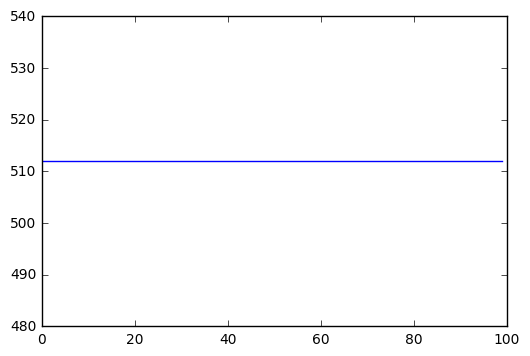

In [26]:
plt.plot(w_count[:100])

* 下面为所有feature上权重绝对值的sum

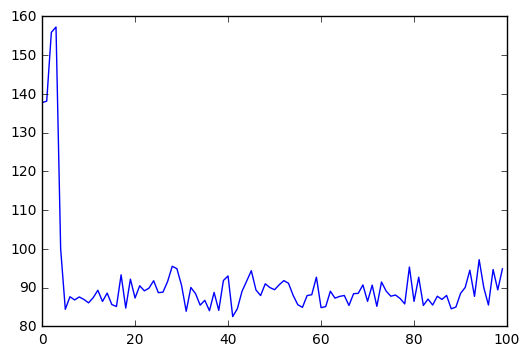

In [27]:
plt.plot(w_sum)

* L1在样本量足够多的时候并不很有效，收敛非常慢，按照此处的batch_size，和epoch数量，权重的迭代的次数=(100/15)*100，大概为下面L0 penalty中setting的10倍，因为收敛慢而且没效，于是这里只取了100个epoch，还没有完全收敛

In [32]:
#L1 

loaded_model_l1 = Sequential()
layer1 = Dense(512, activation="relu", init="normal", input_dim=p, W_regularizer=regularizers.l1(1))
# layer1 = Dense(16, activation="relu", init="normal", input_dim=p, kernel_regularizer=regularizers.l1(0.05))#activity_regularizer=regularizers.l1(0.1)
layer2 = Dense(1, activation="linear", init="normal", input_dim=512)
# layer3 = Dense(1, activation="linear", init="normal", input_dim=16)

loaded_model_l1.add(layer1)
loaded_model_l1.add(layer2)
# loaded_model_l1.add(layer3)

loaded_model_l1.load_weights("/home/zhengfeng/exp/weights.h5")
loaded_model_l1.compile(loss='mean_squared_error', optimizer=optimizers.Adam())
loaded_model_l1.fit(X, y, validation_data=(ValidationX,Validationy), batch_size=15, nb_epoch=100)
score2 = loaded_model_l1.evaluate(ValidationX, Validationy, batch_size=128)
w = layer1.get_weights()
np.savetxt('/home/zhengfeng/exp/WL1.txt',w[0].T)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, kernel_initializer="normal", activation="relu", kernel_regularizer=<keras.reg..., input_dim=100)`
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="normal", activation="linear", input_dim=512)`


Train on 10000 samples, validate on 500 samples
Epoch 1/100
10000/10000 [==============================] - 1s - loss: 3517.5424 - val_loss: 359.2036
Epoch 2/100
10000/10000 [==============================] - 0s - loss: 144.1127 - val_loss: 73.4395
Epoch 3/100
10000/10000 [==============================] - 0s - loss: 57.3533 - val_loss: 43.7716
Epoch 4/100
10000/10000 [==============================] - 1s - loss: 37.4251 - val_loss: 31.9590
Epoch 5/100
10000/10000 [==============================] - 0s - loss: 29.8615 - val_loss: 27.2712
Epoch 6/100
10000/10000 [==============================] - 0s - loss: 27.1336 - val_loss: 26.2613
Epoch 7/100
10000/10000 [==============================] - 0s - loss: 26.3525 - val_loss: 25.7685
Epoch 8/100
10000/10000 [==============================] - 0s - loss: 25.6988 - val_loss: 24.9361
Epoch 9/100
10000/10000 [==============================] - 1s - loss: 25.1989 - val_loss: 24.2709
Epoch 10/100
10000/10000 [==============================] - 1s - l

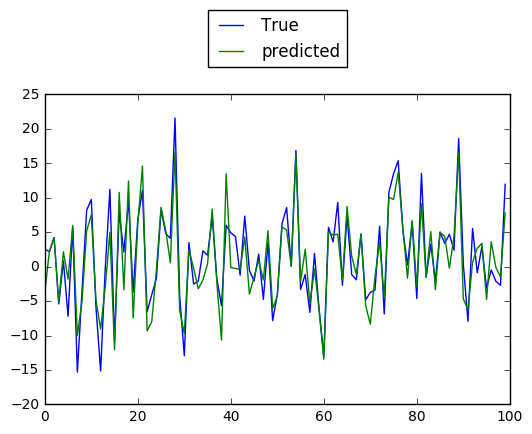

In [33]:
predictY = loaded_model_l1.predict(ValidationX)
plt.plot(Validationy[:100], label = 'True')
plt.plot(predictY[:100], label = "predicted")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3))
plt.show()

In [34]:
weight_L1 = np.loadtxt('/home/zhengfeng/exp/WL1.txt')
w_count = np.full_like(weight_L1[0],0)
w_sum = np.full_like(weight_L1[0],0.0)
for i in range(weight_L1.shape[0]):
    w_sum += abs(weight_L1[i])
    w_count += (abs(weight_L1[i])>0)*1

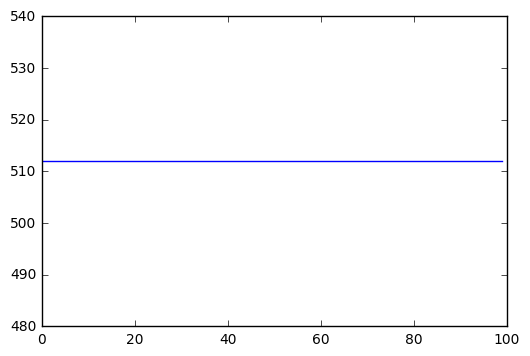

In [35]:
plt.plot(w_count)

<Container object of 100 artists>

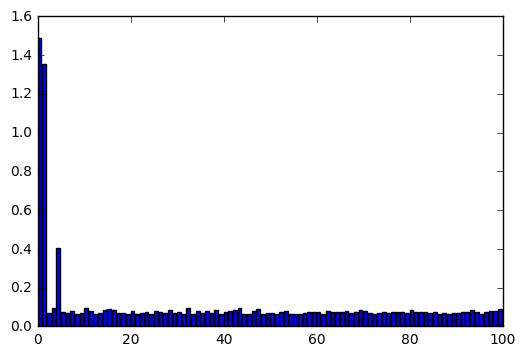

In [36]:
plt.bar(range(100),w_sum[:100])

* L0 penalty采用与上面结构相同的网络，第一层加strength=1，τ=0.1，lr=0.005的L0 penalty，采用预训练参数W，在这个实验里loss可以很快降到2.4

In [63]:
#l0training

loaded_model = Sequential()
# layer1 = Dense(16, activation="relu", init="normal", input_dim=p, W_regularizer=regularizers.l1(0.5))
layer1 = Dense(512, activation="relu", init="normal", input_dim=p)
layer2 = Dense(1, activation="linear", init="normal", input_dim=512)
# layer3 = Dense(1, activation="linear", init="normal", input_dim=16)
# layer4 = Dense(1, activation="linear", init="normal", input_dim=16)
# layer3 = Dense(1, activation="linear", init="normal", input_dim=16)

loaded_model.add(layer1)
loaded_model.add(layer2)
# loaded_model.add(layer3)
# loaded_model.add(layer4)
loaded_model.load_weights("/home/zhengfeng/exp/weights.h5")
# loaded_model.compile(loss='mean_squared_error', optimizer=optimizers.AdamModified(tau=0.2, alpha=0.2, lr = 0.1))
# loaded_model.compile(loss='mean_squared_error', optimizer=optimizers.SGDModified(tau=0.2, alpha=0.1,lr =0.05))
loaded_model.compile(loss='mean_squared_error', optimizer=optimizers.SGDModifiedOnLayer(layers=[0],tau=0.1, alpha=1,lr =0.005))
# loaded_model.compile(loss='mean_squared_error', optimizer=optimizers.Adam()5
loaded_model.fit(X, y, validation_data=(ValidationX,Validationy), batch_size=100, nb_epoch=80)
score2 = loaded_model.evaluate(ValidationX, Validationy, batch_size=128)
w = layer1.get_weights()
np.savetxt('/home/zhengfeng/exp/WL0.txt',w[0].T)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, kernel_initializer="normal", activation="relu", input_dim=100)`
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="normal", activation="linear", input_dim=512)`


Train on 10000 samples, validate on 500 samples
Epoch 1/80
10000/10000 [==============================] - 0s - loss: 9.8380 - val_loss: 11.9279
Epoch 2/80
10000/10000 [==============================] - 0s - loss: 10.2610 - val_loss: 7.2162
Epoch 3/80
10000/10000 [==============================] - 0s - loss: 7.9875 - val_loss: 6.5052
Epoch 4/80
10000/10000 [==============================] - 0s - loss: 7.2621 - val_loss: 6.1225
Epoch 5/80
10000/10000 [==============================] - 0s - loss: 6.7458 - val_loss: 5.5763
Epoch 6/80
10000/10000 [==============================] - 0s - loss: 6.3123 - val_loss: 5.0855
Epoch 7/80
10000/10000 [==============================] - 0s - loss: 5.8827 - val_loss: 4.8177
Epoch 8/80
10000/10000 [==============================] - 0s - loss: 5.5904 - val_loss: 4.8862
Epoch 9/80
10000/10000 [==============================] - 0s - loss: 5.2914 - val_loss: 4.4276
Epoch 10/80
10000/10000 [==============================] - 0s - loss: 4.9905 - val_loss: 4.1670

* 下面是拟合结果与ground truth对比

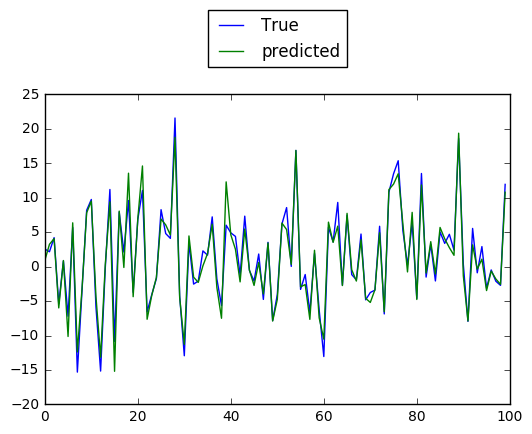

In [54]:
predictY = loaded_model.predict(ValidationX)
plt.plot(Validationy[:100], label = 'True')
plt.plot(predictY[:100], label = "predicted")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3))
plt.show()

In [55]:
weight_L0 = np.loadtxt('/home/zhengfeng/exp/WL0.txt')

In [56]:
w_count = np.full_like(weight_L0[0],0)
w_sum = np.full_like(weight_L0[0],0.0)
for i in range(weight_L0.shape[0]):
    w_sum += abs(weight_L0[i])
    w_count += (abs(weight_L0[i])>0)*1

* 下面是全部feature在所有第一层neuron上非零权重的count

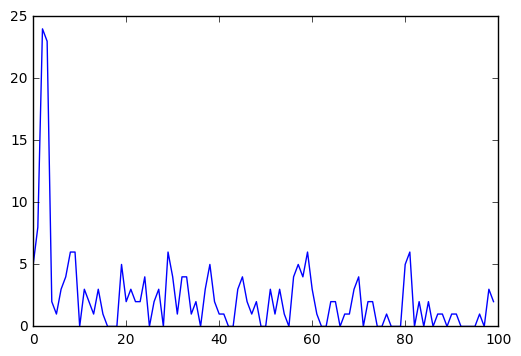

In [57]:
plt.plot(w_count)

* 前50个feature非零权重的count

<Container object of 50 artists>

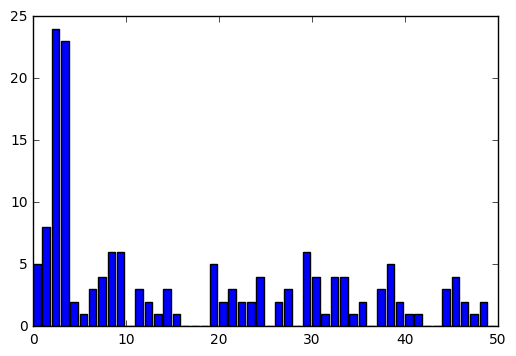

In [58]:
plt.bar(range(50),w_count[:50])

* 所有权重权重绝对值的累加

<Container object of 100 artists>

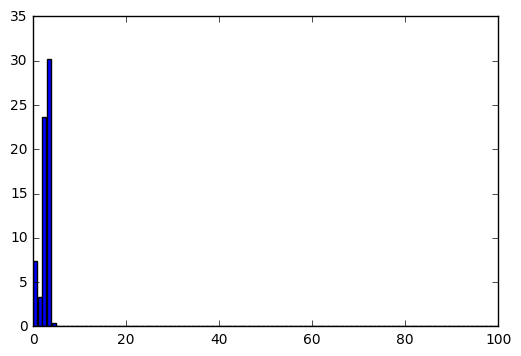

In [59]:
plt.bar(range(100),w_sum[:100])